# Sistem Kontrol Frekuensi Putaran Kipas Angin Otomatis 
# dengan Metode Fuzzy Tsukamoto.

<h3>    </h3>

   Studi kasus untuk implementasi metode fuzzy tsukamoto adalah sistem kontrol untuk menentukan frekuensi putar sebuah kipas angin. Sistem kontrol ini menggunakan dua masukan, yaitu **kecepatan putar kipas** dan **suhu ruangan**, dan menghasilkan keluaran berupa **frekuensi kipas angin**. Demi memperjelas permasalahan studi kasus, berikut penjelasan lebih detail :

   *Untuk mengatur frekuensi putar kipas angin secara otomatis digunakan sistem kontrol yang dapat mengkontrol sumber frekuensi putar kipas angin. Sistem kontrol ini dipengaruhi oleh tiga variabel, yaitu kecepatan putar kipas angin, suhu ruangan, dan sumber frekuensi putar kipas angin. Berdasarkan data spesifikasi dari pabrik, kecepatan putar kipas angin terkecil adalah 1000 rpm (rotation per minute) dan terbesar adalah 5000 rpm, kemampuan sensor suhu ruangan berada dalam interval 100 kelvin hingga 600 kelvin, sedangkan sumber frekuensi putar kipas angin hanya mampu menyediakan frekuensi sebesar 2000 hz hingga 7000 hz.*

*Berapakah sumber frekuensi putar yang dihasilkan sistem kontrol bila saat itu sensor suhu menunjukkan angka 300 kelvin, sedangkan kipas angin berputar dengan kecepatan 4000 rpm?*

Dalam memecahkan solusi studi kasus menggunakan model fuzzy tsukamoto, urutan langkah yang akan ditempuh adalah :
1. Fuzzification
2. Fuzzy Rule Base
3. Inference Enginer 
4. Defuzzification

## Tahapan- tahapan Metode Fuzzy Tsukamoto

### Tahapan 1 : Fuzzification

Fuzzifikasi adalah proses untuk merubah nilai crips menjadi nilai fuzzy. Nilai fuzzy berupa himpunan fuzzy yang masing-masing akan memiliki derajat keanggotaan dengan rentang antara 0 hingga 1. Sebagaimana yang dijelaskan dalam studi kasus, variabel yang digunakan ada tiga macam, dua variabel sebagai input (kecepatan kipas dan suhu) dan satu variabel sebagai output, yaitu frekuensi. Masing-masing variabel memiliki himpunan fuzzy-nya :
- Variabel Kecepatan = {LAMBAT, CEPAT} dengan domain 1000 - 5000
- Variabel Suhu = {RENDAH, TINGGI} dengan domain 100-600
- Variabel Frekuensi = {KECIL, BESAR} dengan domain 2000-7000

#### Plotting Fungsi Keanggotaan

***Fuzzifikasi Variabel Kecepatan*** 

Variabel kecepatan terdiri atas 2 himpunan fuzzy, yaitu LAMBAT dan CEPAT. Fuzzifikasi kecepatan adalah untuk mencari derajat keanggotaan himpunan LAMBAT dan CEPAT berdasarkan masukan kecepatan sebesar 4000 rpm. derajat keanggotaan kecepatan disimbolkan dengan miu[x].

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [2]:
variable_speed = ctrl.Antecedent(np.arange(0,6000,1),'variable_speed')
variable_speed_x = np.arange(0,6000,1) 

In [3]:
variable_speed['LAMBAT'] = fuzz.trapmf(variable_speed.universe,[0,0,1000,5000]) 
variable_speed['CEPAT'] = fuzz.trapmf(variable_speed.universe,[1000,5000,6000,6000])

Plotting fungsi keanggotaan  $\mu slow(x)$

Text(0.5, 1.0, 'LAMBAT')

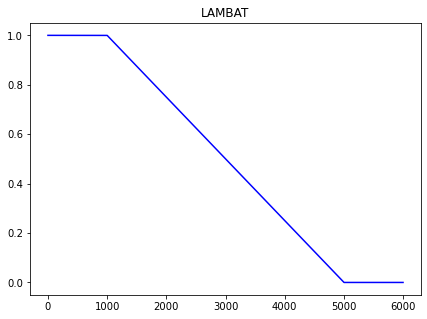

In [4]:
variable_slow = fuzz.trapmf(variable_speed_x,[0,0,1000,5000])
fig, (ax0) = plt.subplots(nrows=1,figsize=(7,5))
ax0.plot(variable_speed_x,variable_slow,'blue')
ax0.set_title('LAMBAT')

Plotting fungsi keanggotaan $\mu fast(x)$

Text(0.5, 1.0, 'CEPAT')

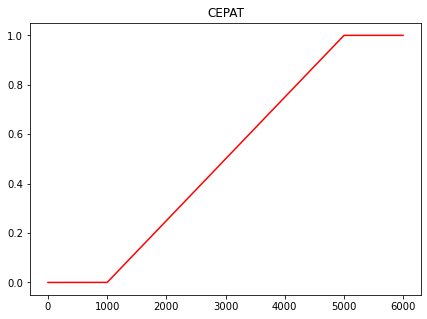

In [5]:
variable_fast = fuzz.trapmf(variable_speed_x,[1000,5000,6000,6000])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(7,5))
ax2.plot(variable_speed_x,variable_fast,'red')
ax2.set_title('CEPAT')

Plotting ke dua fungsi keanggotaan variable speed  $\mu (x)$

C:\Users\ACER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


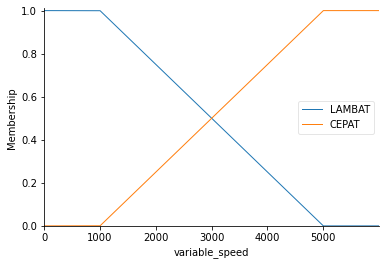

In [6]:
variable_speed.view()

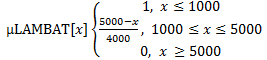

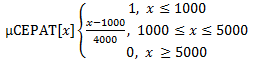

Maka, derajat keanggotaan untuk kecepatan 4000 rpm, adalah : 

miuLAMBAT[4000] = (5000-4000)/4000 = 0,25 

miuCEPAT[4000] = (4000-1000)/4000 = 0,75

***Fuzzifikasi Veriabel Suhu***

Variabel suhu terdiri atas 2 himpunan fuzzy, yaitu RENDAH dan TINGGI. Fuzzifikasi suhu adalah untuk mencari derajat keanggotaan himpunan RENDAH dan TINGGI berdasarkan masukan suhu sebesar 300 kelvin. derajat keanggotaan suhu disimbolkan dengan miu[y].

In [7]:
variable_temperature = ctrl.Antecedent(np.arange(0,700,1),'variable_temperature')
variable_temperature_x = np.arange(0,700,1)

In [8]:
variable_temperature['low'] = fuzz.trapmf(variable_temperature.universe,[0,0,100,600])
variable_temperature['high'] = fuzz.trapmf(variable_temperature.universe,[100,600,700,700])

Plotting fungsi keanggotaan $\mu low(y)$

Text(0.5, 1.0, 'LOW')

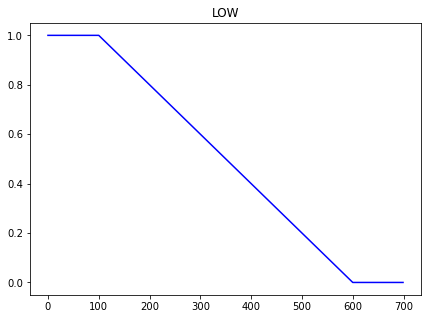

In [9]:
variable_low = fuzz.trapmf(variable_temperature_x,[0,0,100,600])
fig, (ax0) = plt.subplots(nrows=1,figsize=(7,5))
ax0.plot(variable_temperature_x,variable_low,'blue')
ax0.set_title('LOW')

Plotting fungsi keanggotaan $\mu high(y)$

Text(0.5, 1.0, 'HIGH')

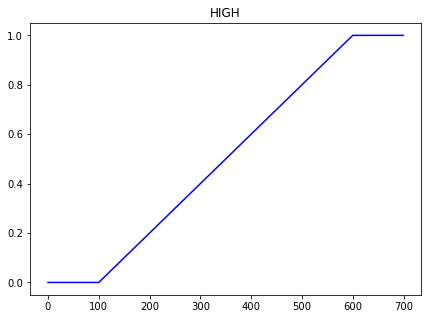

In [10]:
variable_high = fuzz.trapmf(variable_temperature_x,[100,600,700,700])
fig, (ax0) = plt.subplots(nrows=1,figsize=(7,5))
ax0.plot(variable_temperature_x,variable_high,'blue')
ax0.set_title('HIGH')

C:\Users\ACER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


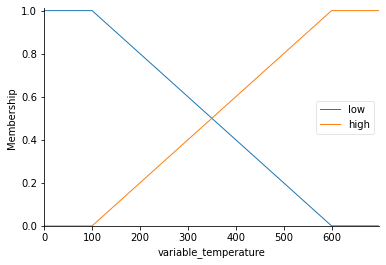

In [11]:
variable_temperature.view()

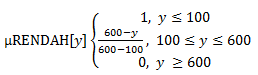

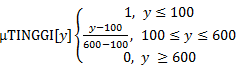

Maka, derajat keanggotaan untuk suhu 300 kelvin, adalah :

miuRENDAH[300] = (600-300)/500 = 0,6

miuTINGGI[300] = (300-100)/500 = 0,4

***Fuzzifikasi Veriabel Frekuensi***

Variabel frekuensi terdiri atas dua himpunan, yaitu KECIL dan BESAR, dengan domain pada interval 2000-7000. Domain tersebut berguna dalam proses perhitungan nilai Z, pada saat proses inferensi tsukamoto. nilai Z pada metode tsukamoto, diperoleh dengan cara : 

z = zmax - a_predikat(zmax - zmin); zmax = 7000 ; zmin = 2000 ; a_predikat = hasil fungsi MIN

In [12]:
variable_frek = ctrl.Antecedent(np.arange(0,8000,1),'variable_frekuensi')
variable_frek_x = np.arange(0,8000,1)

In [13]:
variable_frek['small'] = fuzz.trapmf(variable_frek.universe,[0,0,2000,7000])
variable_frek['big'] = fuzz.trapmf(variable_frek.universe,[2000,7000,8000,8000])

Plotting fungsi keanggotaan $\mu(z)$

C:\Users\ACER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


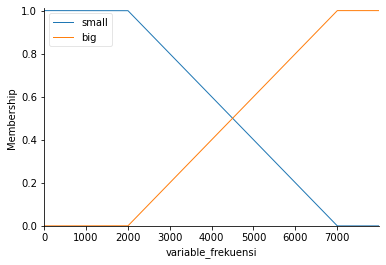

In [14]:
variable_frek.view()

### Tahapan 2 : FUZZY RULE BASE

Menggunakan 4 rule berikut :
- [R1] IF kecepatan LAMBAT dan suhu TINGGI then frekuensi KECIL 
- [R2] IF kecepatan LAMBAT dan suhu RENDAH then frekuensi KECIL 
- [R3] IF kecepatan CEPAT dan suhu TINGGI then frekuensi BESAR 
- [R4] IF kecepatan CEPAT dan suhu RENDAH then frekuensi BESAR

### TAHAP 3 : INFERENCE ENGINE

Pada mesin inferensi, kita terapkan fungsi MIN untuk setiap aturan pada aplikasi fungsi implikasinya. Sehingga penerapan fungsi MIN dilakukan sebanyak 4 kali, sesuai dengan banyaknya aturan fuzzy-nya (rulebase).

In [15]:
import numpy as np
import pandas as pd


##### [R1] IF kecepatan LAMBAT dan suhu TINGGI then frekuensi KECIL 

In [16]:
#[R1] IF kecepatan LAMBAT dan suhu TINGGI then frekuensi KECIL 

R1 = pd.read_csv('Predikat1.csv')
R1.head(10)

,[R1] IF kecepatan LAMBAT dan suhu TINGGI then frekuensi KECIL
0,"a_predikat1 = min(miuLAMBAT[4000], miuTINGGI[3..."
1,"a_predikat1 = min(0,25 ; 0,4)"
2,"a_predikat1 = 0,25"
3,z1 = zmax - a_predikat1 (zmax-zmin)
4,"z1 = 7000 - 0,25(7000-2000)"
5,z1 = 5750 rpm


##### [R2] IF kecepatan LAMBAT dan suhu RENDAH then frekuensi KECIL 

In [17]:
#[R2] IF kecepatan LAMBAT dan suhu RENDAH then frekuensi KECIL 
R2 = pd.read_csv('Predikat2.csv')
R2.head(10)

,[R2] IF kecepatan LAMBAT dan suhu RENDAH then frekuensi KECIL
0,"a_predikat2 = min(miuLAMBAT[4000], miuRENDAH[3..."
1,"a_predikat2 = min(0,25 ; 0,6)"
2,"a_predikat2 = 0,25"
3,z2 = zmax - a_predikat2(zmax-zmin)
4,"z2 = 7000 - 0,25(7000-2000)"
5,z2 = 5750 rpm


##### [R3] IF kecepatan CEPAT dan suhu TINGGI then frekuensi BESAR 

In [18]:
#[R3] IF kecepatan CEPAT dan suhu TINGGI then frekuensi BESAR 
R3 = pd.read_csv('Predikat3.csv')
R3.head(10)

,[R3] IF kecepatan CEPAT dan suhu TINGGI then frekuensi BESAR
0,"a_predikat3 = min(miuCEPAT[4000], miuTINGGI[300])"
1,"a_predikat3 = min(0,75 ; 0,4)"
2,"a_predikat3 = 0,4"
3,z3 = zmin - a_predikat3(zmin-zmax)
4,"z3 = 2000 - 0,4(2000-7000)"
5,z3 = 4000 rpm


##### [R4] IF kecepatan CEPAT dan suhu RENDAH then frekuensi BESAR 

In [19]:
#[R4] IF kecepatan CEPAT dan suhu RENDAH then frekuensi BESAR 
R4 = pd.read_csv('Predikat4.csv')
R4.head(10)

,[R4] IF kecepatan CEPAT dan suhu RENDAH then frekuensi BESAR
0,"a_predikat4 = min(miuCEPAT[4000], miuRENDAH[300])"
1,"a_predikat4 = min(0,75 ; 0,6)"
2,"a_predikat4 = 0,6"
3,z4 = zmin - a_predikat4(zmin-zmax)
4,"z4 = 2000 - 0,6(2000-7000)"
5,z4 = 5000 rpm


### TAHAP 4 : DEFUZZIFICATION

In [20]:
fre = pd.read_csv('Z.csv')
fre.head()

,Z = aPredikat1 * z1 + aPredikat2 * z2 + aPredikat3 * z3 + aPredikat4 * z4 / aPredikat1 + aPredikat2 + aPredikat3 + aPredikat4,Z = 0.25 * 5750 + 0.25 * 5750 + 0.4 * 4000 + 0.6 * 5000 / 0.25 + 0.25 + 0.4 + 0.6
0,Z = 7475 / 1.5,Z = 4983.3333333333


Jadi dapat disimpulkan, melalui hasil defuzzifikasi ini diketahui bahwa suhu 300 kelvin dan kecepatan 4000 rpm akan menghasilkan sumber frekuensi putar kipas angin sebesar 4983.3333333333 Hz.

<h3>   </h3>

## Mengetahui Hasil Defuzzifikasi Menggunakan Program Python


In [21]:
def low(b,a,x):
    if(x<=a):
        value = 1
    elif(x>a and x<b):
        value = (b-x)/(b-a)
    elif(x>=b):
        value = 0

    return value

In [22]:
def high(b,a,x):
    if(x<=a):
        value = 0
    elif(x>a and x<b):
        value = (x-a)/(b-a)
    elif(x>=b):
        value = 1

    return value

In [23]:
def agregasi_low(b,a,alfa):
    value = b - (alfa*(b-a))
    return value


In [24]:
def agregasi_high(b,a,alfa):
    value = alfa*(b-a) + a
    return value

In [25]:
var = int(input("Jumlah variabel: "))

nama_var = []
for i in range(var):
    nama = input("Masukkan nama variabel: ")
    nama_var.append(nama)

Jumlah variabel: 3
Masukkan nama variabel: variable_speed
Masukkan nama variabel: variable_temperature
Masukkan nama variabel: variable_frek


In [33]:
variabel = dict()
for i in nama_var:
    print(i)
    down = int(input("low : "))
    up = int(input("high : "))
    variabel.update({i+"_low":down})
    variabel.update({i+"_high":up})
    
print(variabel)

variable_speed
low : 1000
high : 5000
variable_temperature
low : 100
high : 600
variable_frek
low : 2000
high : 7000
{'variable_speed_low': 1000, 'variable_speed_high': 5000, 'variable_temperature_low': 100, 'variable_temperature_high': 600, 'variable_frek_low': 2000, 'variable_frek_high': 7000}


In [34]:
soal = dict()

jml = int(input("Jumlah variabel yang diketahui : "))

for i in range(jml):
    ver = input("Nama variabel : ")
    val = int(input("Nilai : "))   
    soal.update({ver:val})
    
print(soal)

dit = input("Variabel yang ditanyakan : ")

Jumlah variabel yang diketahui : 2
Nama variabel : variable_speed
Nilai : 4000
Nama variabel : variable_temperature
Nilai : 300
{'variable_speed': 4000, 'variable_temperature': 300}
Variabel yang ditanyakan : variable_frek


In [35]:
nk = dict()
for i in soal:
    
    down = low(variabel[i+"_high"],variabel[i+"_low"],soal[i])
    up = high(variabel[i+"_high"],variabel[i+"_low"],soal[i])
    nk.update({i+"_low":down})
    nk.update({i+"_high":up})

print(nk)

{'variable_speed_low': 0.25, 'variable_speed_high': 0.75, 'variable_temperature_low': 0.6, 'variable_temperature_high': 0.4}


In [36]:
# [R1] if kecepatan LAMBAT and suhu TINGGI, then frekuensi KECIL
# [R2] if kecepatan LAMBAT and suhu RENDAH, then frekuensi KECIL
# [R3] if kecepatan CEPAT and suhu TINGGI, then frekuensi BESAR
# [R4] if kecepatan CEPAT and suhu RENDAH, then frekuensi BESAR

In [37]:
#AGREGASI
alfa = []
z = []

r = int(input("Masukkan jumlah peraturan : "))

for i in range(r):
    kondisi1 = input("Jika: ")
    kondisi2 = input("dan: ")
    kesimpulan = input("maka: ")
    print("--------------------------------------------")    
    #Fire Strength INTERSEKSI (AND)
    a = min(nk[kondisi1],nk[kondisi2]) 
    alfa.append(a)
    if(kesimpulan == "low"):
        zz = agregasi_low(variabel[dit+"_high"],variabel[dit+"_low"],a)
    elif(kesimpulan == "high"):
        zz = agregasi_high(variabel[dit+"_high"],variabel[dit+"_low"],a)        
    z.append(zz)

Masukkan jumlah peraturan : 4
Jika: variable_speed_low
dan: variable_temperature_high
maka: low
--------------------------------------------
Jika: variable_speed_low
dan: variable_temperature_low
maka: low
--------------------------------------------
Jika: variable_speed_high
dan: variable_temperature_low
maka: high
--------------------------------------------
Jika: variable_speed_high
dan: variable_temperature_high
maka: high
--------------------------------------------


In [38]:
print("aPredikat: ") 
print(alfa)
print("__________________________________")
print("Score_z: ") 
print(z)

aPredikat: 
[0.25, 0.25, 0.6, 0.4]
__________________________________
Score_z: 
[5750.0, 5750.0, 5000.0, 4000.0]


In [39]:
#DEFUZIFIKASI
df = 0

for i in range(len(alfa)):
    df += alfa[i]*z[i]

defuz = float(df/sum(alfa))

print("Jadi, hasil defuzzifikasi",dit," adalah ",defuz)

Jadi, hasil defuzzifikasi variable_frek  adalah  4983.333333333333


Demikianlah, penjelasan ringkas mengenai penerapan metode fuzzy tsukamoto berdasarkan perhitungan manual, maupun pemrograman Python.

<h3>   </h3>

<h3>   </h3>

<h3>   </h3>

**Nama </p>: Cuh Meizi Sasfini**

**NIM </p>: 09011381924120**

**Kelas </p>: SK 5A**

**MK </p>: Artificial Intelligence**